In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#%matplotlib notebook
%matplotlib inline

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [3]:
api_key = api_keys.api_key

In [4]:
cities = cities[:500]

In [5]:
city

'ilulissat'

In [6]:
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"

In [7]:
response = requests.get(url)

In [8]:
response.status_code

200

In [9]:
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 80
    },
    "cod": 200,
    "coord": {
        "lat": 69.22,
        "lon": -51.1
    },
    "dt": 1539474600,
    "id": 3423146,
    "main": {
        "humidity": 73,
        "pressure": 998,
        "temp": 268.15,
        "temp_max": 268.15,
        "temp_min": 268.15
    },
    "name": "Ilulissat",
    "sys": {
        "country": "GL",
        "id": 4805,
        "message": 0.0033,
        "sunrise": 1539512981,
        "sunset": 1539546563,
        "type": 1
    },
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 5.1
    }
}


In [10]:
#initializing list
citiesFound = []
clouds = []
country = []
dt = []
humidity = []
lat = []
lon = []
temp_max = []
speed = []

cities

['ushuaia',
 'sur',
 'sakaiminato',
 'illoqqortoormiut',
 'kilindoni',
 'margate',
 'port alfred',
 'urdoma',
 'touros',
 'deputatskiy',
 'mahebourg',
 'rikitea',
 'new norfolk',
 'naryan-mar',
 'puerto ayora',
 'broome',
 'cape town',
 'mataura',
 'jumla',
 'santa rosa',
 'saint-philippe',
 'punta arenas',
 'hermanus',
 'kavaratti',
 'abu kamal',
 'talnakh',
 'busselton',
 'butaritari',
 'mar del plata',
 'vaitupu',
 'qaanaaq',
 'cidreira',
 'abashiri',
 'upernavik',
 'saint-pierre',
 'nizhneyansk',
 'tombouctou',
 'bicazu ardelean',
 'galle',
 'vaini',
 'taree',
 'lorengau',
 'omsukchan',
 'tiksi',
 'baruun-urt',
 'thompson',
 'northam',
 'olafsvik',
 'saint george',
 'sola',
 'mount isa',
 'acajutla',
 'ilebo',
 'port elizabeth',
 'qasigiannguit',
 'lazaro cardenas',
 'sokoni',
 'tautira',
 'road town',
 'ukiah',
 'sorong',
 'henties bay',
 'atuona',
 'blairmore',
 'moerai',
 'chuy',
 'le port',
 'camacha',
 'praia da vitoria',
 'karratha',
 'kupang',
 'pangnirtung',
 'amazar',
 'ar

In [11]:
for city in cities:
    
    try:
        #print(city)
        url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
    
        #time.sleep(1)
        
        response = requests.get(url).json()
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        speed.append(response['wind']['speed'])
        citiesFound.append(city)
    
    except:
        #print("City Not Found")
        print(city)

illoqqortoormiut
vaitupu
nizhneyansk
olafsvik
taolanaro
bairiki
grand centre
tahta
khonuu
porto santo
kismayo
sataua
kuche
sosnovskiy
muzquiz
attawapiskat
viligili
barentsburg
belushya guba
labutta
torit
grand river south east
uwayl
lolua
tumannyy
marcona
poliyiros
sentyabrskiy
palabuhanratu
tsienyane
bengkulu
hvammstangi
vaovai
cruden bay
mergui
qandahar
tsihombe
utiroa
bokspits
tatawin
tungkang
laiagam
aflu
jinchengjiang
higuey
mys shmidta
kazalinsk
asau
pemangkat
saleaula
felidhoo
samalaeulu
korla
aktas
saryshagan


In [12]:
weather_dict = {
    "City": citiesFound,
    "Cloudiness": clouds,
    "Country": country,
    "Date": dt,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max_Temp": temp_max,
    "Wind_Speed": speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,ushuaia,40,AR,1539475200,81,-54.81,-68.31,275.150,6.20
1,sur,8,OM,1539477158,100,22.57,59.53,299.044,0.97
2,sakaiminato,75,JP,1539475200,87,35.55,133.23,289.150,1.50
3,kilindoni,76,TZ,1539477497,100,-7.91,39.67,299.244,4.72
4,margate,75,AU,1539475200,59,-43.03,147.26,291.150,4.10


In [13]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 9 columns):
City          445 non-null object
Cloudiness    445 non-null int64
Country       445 non-null object
Date          445 non-null int64
Humidity      445 non-null int64
Lat           445 non-null float64
Lng           445 non-null float64
Max_Temp      445 non-null float64
Wind_Speed    445 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 31.4+ KB


In [14]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
count,445.000000,4.450000e+02,445.000000,445.000000,445.000000,445.000000,445.000000
mean,42.961798,1.539476e+09,78.793258,22.202225,12.799191,287.664881,3.691438
std,35.538913,1.298668e+03,19.710459,33.730373,89.872314,10.702577,2.697877
min,0.000000,1.539472e+09,6.000000,-54.810000,-173.230000,255.894000,0.320000
25%,1.000000,1.539475e+09,70.000000,-5.200000,-66.470000,280.350000,1.520000
50%,40.000000,1.539477e+09,82.000000,29.640000,14.170000,289.444000,3.100000
75%,76.000000,1.539478e+09,94.000000,50.100000,88.520000,296.494000,5.100000
max,100.000000,1.539478e+09,100.000000,78.220000,179.320000,307.150000,19.000000


In [15]:
weather_data.count()

City          445
Cloudiness    445
Country       445
Date          445
Humidity      445
Lat           445
Lng           445
Max_Temp      445
Wind_Speed    445
dtype: int64

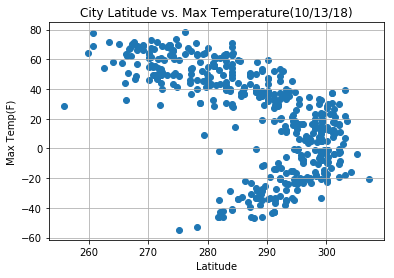

In [23]:
# # Build a scatter plot for each data type
plt.scatter(temp_max, lat)

# # Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(10/13/18)")
plt.ylabel("Max Temp(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

#Show plot
plt.show()

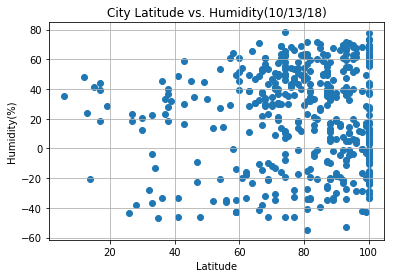

In [24]:
plt.scatter(humidity, lat)

# # Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(10/13/18)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("HumidityInWorldCities.png")

# # Show plot
plt.show()

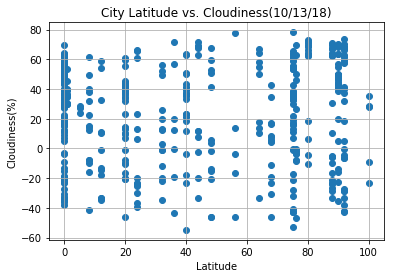

In [25]:
plt.scatter(clouds, lat)

# # Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(10/13/18)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("CloudinessInWorldCities.png")

# # Show plot
plt.show()

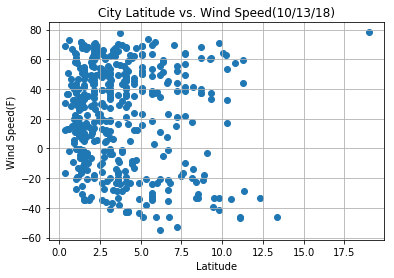

In [26]:
plt.scatter(speed, lat)

# # Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(10/13/18)")
plt.ylabel("Wind Speed(F)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# # Show plot
plt.show()